In [4]:
import numpy as np;
import pandas as pd;
a=pd.Series(['a','s','s','d'])
print(a)

0    a
1    s
2    s
3    d
dtype: object


In [5]:
a.describe

<bound method NDFrame.describe of 0    a
1    s
2    s
3    d
dtype: object>

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 76s 4us/step


In [7]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [8]:
 len(train_data)

8982

In [9]:
len(test_data)

2246

In [10]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [11]:
 train_labels[10]

3

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 436us/step - loss: 2.6490 - accuracy: 0.5246 - val_loss: 1.7377 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.4240 - accuracy: 0.6969 - val_loss: 1.3170 - val_accuracy: 0.6990
Epoch 3/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.0551 - accuracy: 0.7754 - val_loss: 1.1678 - val_accuracy: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.8394 - accuracy: 0.8216 - val_loss: 1.0462 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.6733 - accuracy: 0.8582 - val_loss: 0.9823 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.5399 - accuracy: 0.8879 - val_loss: 0.9657 - val_accuracy: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 185us/step - loss

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

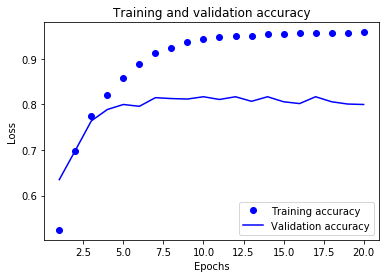

In [23]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 170us/step - loss: 3.1704 - accuracy: 0.4439 - val_loss: 2.3701 - val_accuracy: 0.5720
Epoch 2/10
7982/7982 [==============================] - 1s 145us/step - loss: 1.9627 - accuracy: 0.6339 - val_loss: 1.6825 - val_accuracy: 0.6570
Epoch 3/10
7982/7982 [==============================] - 1s 145us/step - loss: 1.4440 - accuracy: 0.7050 - val_loss: 1.3967 - val_accuracy: 0.6930
Epoch 4/10
7982/7982 [==============================] - 1s 145us/step - loss: 1.1667 - accuracy: 0.7489 - val_loss: 1.2469 - val_accuracy: 0.7370
Epoch 5/10
7982/7982 [==============================] - 1s 145us/step - loss: 0.9826 - accuracy: 0.7908 - val_loss: 1.1490 - val_accuracy: 0.7520
Epoch 6/10
7982/7982 [==============================] - 1s 148us/step - loss: 0.8373 - accuracy: 0.8240 - val_loss: 1.0796 - val_accuracy: 0.7690
Epoch 7/10
7982/7982 [==============================] - 1s 147us/step - loss

In [27]:
results

[1.035792961146082, 0.7702582478523254]

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 151us/step - loss: 3.3005 - accuracy: 0.2392 - val_loss: 2.7976 - val_accuracy: 0.3390
Epoch 2/10
7982/7982 [==============================] - 1s 137us/step - loss: 2.4802 - accuracy: 0.4644 - val_loss: 2.1844 - val_accuracy: 0.5590
Epoch 3/10
7982/7982 [==============================] - 1s 133us/step - loss: 1.9491 - accuracy: 0.5976 - val_loss: 1.8032 - val_accuracy: 0.6290
Epoch 4/10
7982/7982 [==============================] - 1s 133us/step - loss: 1.6168 - accuracy: 0.6533 - val_loss: 1.5767 - val_accuracy: 0.6410
Epoch 5/10
7982/7982 [==============================] - 1s 133us/step - loss: 1.4040 - accuracy: 0.6807 - val_loss: 1.4313 - val_accuracy: 0.6710
Epoch 6/10
7982/7982 [==============================] - 1s 144us/step - loss: 1.2502 - accuracy: 0.7125 - val_loss: 1.3429 - val_accuracy: 0.6950
Epoch 7/10
7982/7982 [==============================] - 1s 133us/step - loss

In [29]:
results

[1.219457010870413, 0.7319679260253906]

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 8us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [11]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))#mse loss function—mean squared error,the square of the difference between the predictions and the targets
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])# mean absolute error (MAE). It’s
                      #the absolute value of the difference between the predictions and the targets
    return model

In [12]:
import numpy as np#k fold method
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [22]:
for i in range(k):
    print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate(
[train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]],
axis=0)
partial_train_targets = np.concatenate(
[train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]],
axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
all_scores

[3.116027593612671, 2.2959935665130615, 2.652630090713501, 2.5542402267456055]

In [24]:
np.mean(all_scores)

2.6547228693962097